### Importing Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pal = sns.color_palette()

import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
shipping_data = pd.read_csv('Ecom_Shipping_stride.csv')
shipping_data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


`The data contains the following information:

* ID: ID Number of Customers.
* Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
* Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
* Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
* Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
* Cost of the product: Cost of the Product in US Dollars.
* Prior purchases: The Number of Prior Purchase.
* Product importance: The company has categorized the product in the various parameter such as low, medium, high.
* Gender: Male and Female.
* Discount offered: Discount offered on that specific product.
* Weight in gms: It is the weight in grams.
* Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time. 
`

In [3]:
shipping_data.shape

(10999, 12)

In [4]:
shipping_data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [5]:
shipping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
shipping_data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [11]:
# Print some information about the data
print("Missing values:", shipping_data.isna().sum().sum())
print('--------------------------------------------------------------------------')
print("Categorical features:", len(shipping_data.select_dtypes('object').columns))
print('--------------------------------------------------------------------------')
print("Categorical features:",(shipping_data.select_dtypes('object').columns))
print('--------------------------------------------------------------------------')
print("Numerical features:", len(shipping_data.select_dtypes('number').columns))
print('--------------------------------------------------------------------------')
print("Numerical features:",(shipping_data.select_dtypes('number').columns))

Missing values: 0
--------------------------------------------------------------------------
Categorical features: 4
--------------------------------------------------------------------------
Categorical features: Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')
--------------------------------------------------------------------------
Numerical features: 8
--------------------------------------------------------------------------
Numerical features: Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')


## Removing ID Column

In [12]:
shipping_data.drop(columns=['ID'], inplace=True)


In [13]:
shipping_data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


### Issues List For the Dataset
Rename columns to be more workable
Other than this, the dataset is very clean

In [15]:
# Renaming columns

shipping_data.rename(columns={'Warehouse_block': 'block',
                   'Mode_of_Shipment': 'ship_method',
                   'Customer_care_calls': 'num_calls',
                   'Customer_rating': 'rating',
                   'Cost_of_the_Product': 'cost',
                   'Prior_purchases': 'num_prev_orders',
                   'Product_importance': 'priority',
                   'Gender': 'gender',
                   'Discount_offered': 'discount',
                   'Weight_in_gms': 'weight',
                   'Reached.on.Time_Y.N': 'on_time'},
          inplace=True)

In [16]:
shipping_data.head()

,block,ship_method,num_calls,rating,cost,num_prev_orders,priority,gender,discount,weight,on_time
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [18]:
print(f'Number of Unique Values in Each Column:\n{shipping_data.nunique()}')


Number of Unique Values in Each Column:
block                 5
ship_method           3
num_calls             6
rating                5
cost                215
num_prev_orders       8
priority              3
gender                2
discount             65
weight             4034
on_time               2
dtype: int64


### finding out what the different values of some columns are

In [19]:
shipping_data.block.unique()


array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [21]:
shipping_data.rating.unique()


array([2, 5, 3, 1, 4], dtype=int64)

In [22]:
shipping_data.ship_method.unique()


array(['Flight', 'Ship', 'Road'], dtype=object)

In [23]:
shipping_data.priority.unique()


array(['low', 'medium', 'high'], dtype=object)

### Correlation of Numerical Features

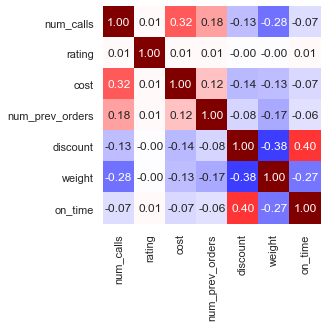

In [25]:
# Display the correlation heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(shipping_data[shipping_data.select_dtypes('number').columns].corr(),
            square=True, cmap='seismic', cbar=False, annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.show()

The Cutomer Rating does not seem correlated at all with other features.



### Feature Vizualisation
Let's visualize the feature repartition.

### Categorical

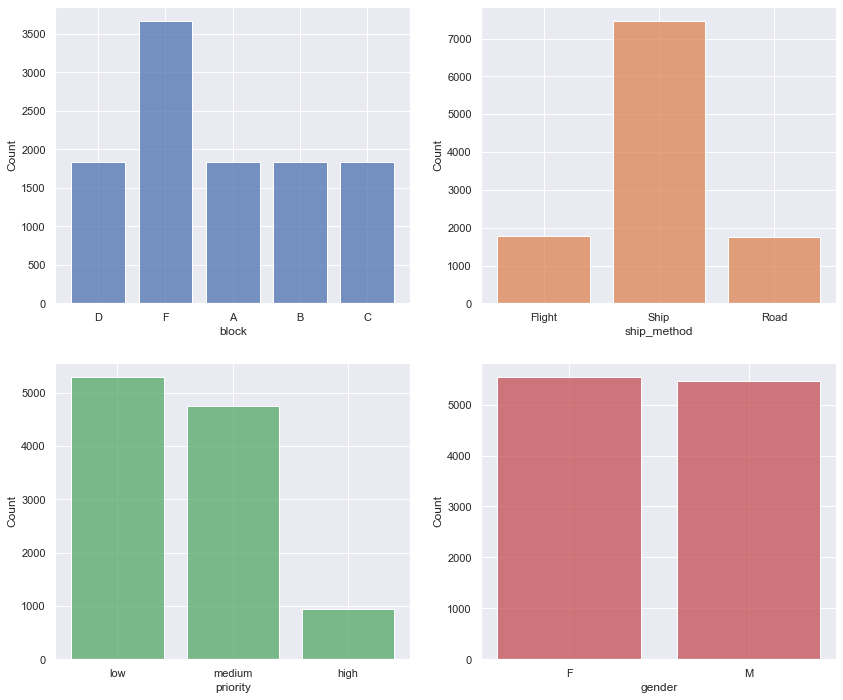

In [39]:
# Display class repartitions
plt.figure(figsize=(14, 12))

cat_features = shipping_data.select_dtypes('object').columns.values

for i, cat in enumerate(cat_features):

    plt.subplot(2, 2, i+1)
    sns.histplot(shipping_data[cat], shrink=0.8, color=pal[i])
    
plt.show()

* Warehouse: Blocks A, B, C, D are equilibrated while block F is predominent (1/2 ratio).
* Shipment: Flight and Road have similar observations while Ship is predominent (1/4 ratio).
* Importance: There is a majority of low and medium importances and a minority of high importances.
* Genders: Both classes are balanced.

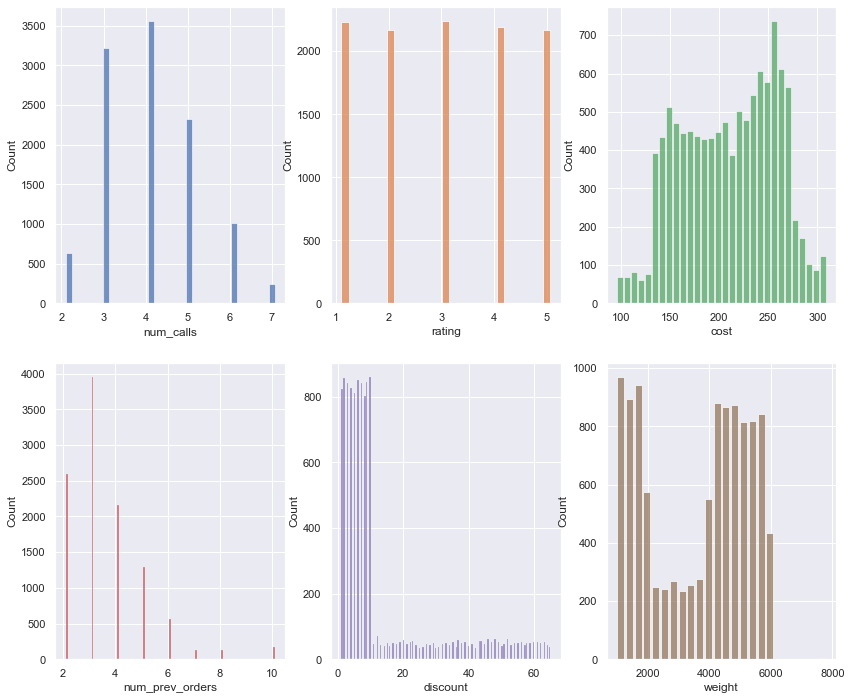

In [42]:
# Display Numeric repartitions
plt.figure(figsize=(14, 12))

num_features = shipping_data.select_dtypes('number').drop('on_time', axis=1).columns.values
for i, num in enumerate(num_features):

    plt.subplot(2,3, i+1)
    sns.histplot(shipping_data[num], shrink=0.8, color=pal[i])
    
plt.show()

* Care Calls: Sligh positive skewed normal distribution with mode at 4.
* Customer Rating: Uniform distribution.
* Costs: 2 picks: smallest around 150, highest around 250.
* Prior Purchases: Positive skewed normal distribution, mode at 3.
* Discount offered: Separated into 2 uniform distributions: 0 to 10 is predominent and then small amount from 10 to 65.
* Weight: 3 zones: high from 1000 to 2000 and from 4000 to 6000. Low from 2000 to 4000.

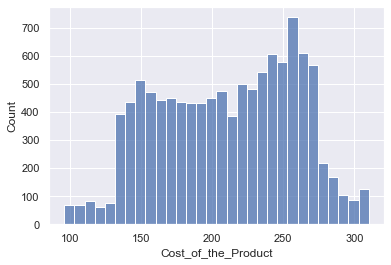

In [6]:
sns.set(style="darkgrid")
df = sns.load_dataset("iris")
sns

sns.histplot(data=shipping_data, x="Cost_of_the_Product")
plt.show()


### plot of the distribution of data in numeric columns


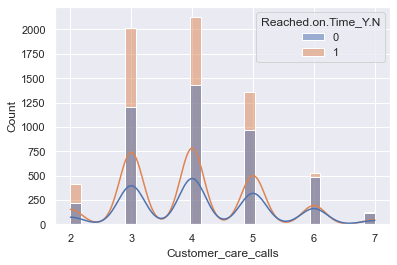

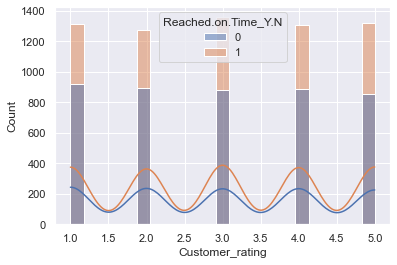

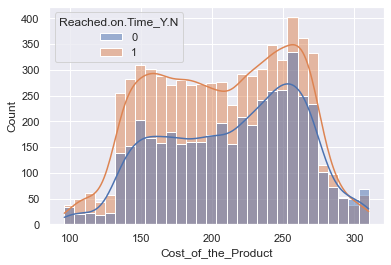

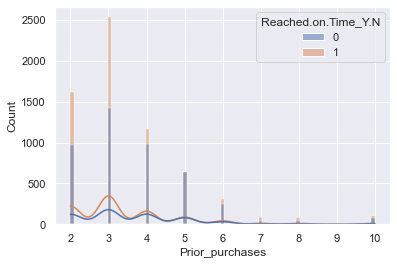

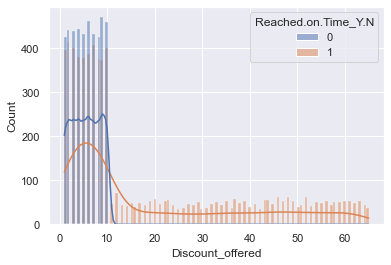

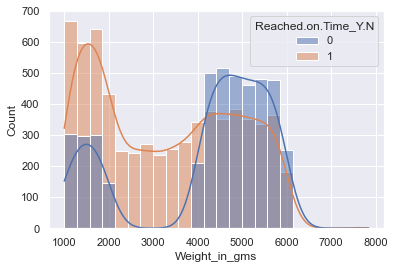

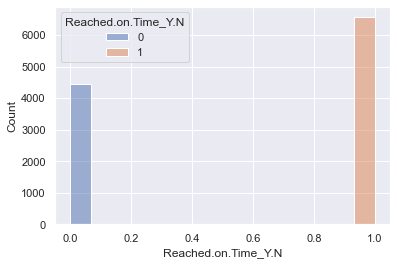

In [11]:
for col in shipping_data.select_dtypes(include=[np.number]).columns:
    
    sns.histplot(data=shipping_data, x=col, kde=True, hue= "Reached.on.Time_Y.N")
    
    plt.show()